# Example notebook for looking at DP1 X-ray crossmatch data

## import packages

You will need to install the nested pandas package[https://nested-pandas.readthedocs.io/en/latest/index.html] to read in the crossmatch results, which are parquet files.

In [1]:
import pandas as pd
import numpy as np

import warnings

# Disable plotting warnings
warnings.filterwarnings("ignore")

from nested_pandas import NestedDtype, read_parquet
import matplotlib.pyplot as plt
import astropy.units as u

# uncomment this line to do crossmatches with lsdb
# import lsdb

pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

## examine the x-ray catalog of x-ray objects observed in DP1
**name:**          the name in the original x-ray catalog  
**ra, dec:**       position in degrees  
**field:**         DP1 field this object is in  
**cat:**           X-ray catalog this object is in  
**F:**             X-ray flux in ergs/s/cm^2. Energy band depends on catalog, see data_processing/xray_catalogs_preprocess.ipynb  
**e_pos_1sig:**    1 sig positional uncertainty in arcseconds  
**e_pos_95:**      95% confidence positional uncertainty in arcseconds  
**tract, patch:**  lsst skymap   
**DP1_flag:**      is in tract, patch seen by DP1 (all True)  
**obj_flag:**      has match to DP1 Object  
**dia_flag:**      has match to DP1 diaObject  

In [2]:
df_X = pd.read_csv('../data/final_data_products/xray_in_DP1.csv')
df_X.head()

,name,ra,dec,e_pos_raw,field,cat,F,e_pos_1sig,e_pos_95,tract,patch,DP1_flag,obj_flag,dia_flag,objectId
0,2CXO J002407.1-720545,6.029833,-72.096061,0.29,47Tuc,CSC2.1,2.369000e-14,0.147959,0.29,453,52,True,False,False,NaN
1,2CXO J002416.9-720427,6.070792,-72.074222,0.29,47Tuc,CSC2.1,3.697000e-14,0.147959,0.29,453,52,True,False,False,NaN
2,2CXO J002406.4-720443,6.026625,-72.078644,0.29,47Tuc,CSC2.1,7.873000e-14,0.147959,0.29,453,52,True,False,False,NaN
3,2CXO J002406.0-720456,6.024958,-72.082308,0.29,47Tuc,CSC2.1,3.061000e-14,0.147959,0.29,453,52,True,False,False,NaN
4,2CXO J002403.5-720452,6.014333,-72.081169,0.29,47Tuc,CSC2.1,4.469000e-13,0.147959,0.29,453,52,True,False,False,NaN


<Axes: >

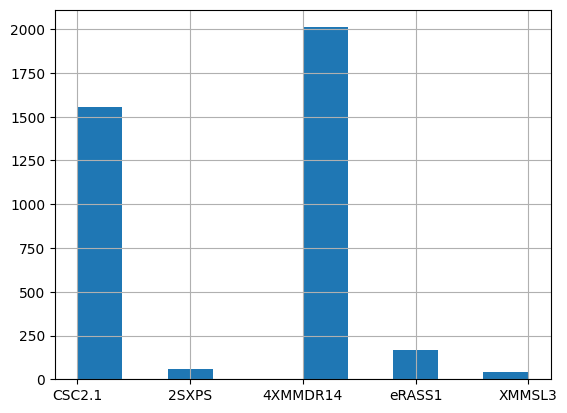

In [3]:
df_X['cat'].hist()

## examine parquet with matches between x-ray catalog and DP1 objects
columns with **_X** suffix are from the x-ray catalog    
columns with **_psfFLuxForcedStetsonJ** are my calculations of the StetsonJ index  
columns with **_nForced** are the number of visits to that object in that band  
column **_dist_arcsec** is the distance between the matches  
the **normalized_dstance** is _dist_arcsec / e_pos_1sig_X  
**F_opt** is the optical flux in ergs/s/cm^2 (over all bands)  
the **reliability** is the probability this match is not by chance: ($e^{-\pi r^2 N}$ where $r$ is _dist_arcsec and $N$ is the number density of objects nearby

In [4]:
obj = read_parquet('../data/final_data_products/obj_dp1_xmatch_added.parquet')

In [5]:
obj.head()

name_X       ra_X     dec_X  e_pos_raw_X  field_X   cat_X  \
0   2SXPS J023246.0+063739   38.19169   6.62774          5.3  SV_38_7   2SXPS   
1   2SXPS J023246.0+063739   38.19169   6.62774          5.3  SV_38_7   2SXPS   
2  XMMSL3 J023029.6+062526  37.623203  6.423948     7.390137  SV_38_7  XMMSL3   
3  XMMSL3 J023029.6+062526  37.623203  6.423948     7.390137  SV_38_7  XMMSL3   
4  XMMSL3 J023029.6+062526  37.623203  6.423948     7.390137  SV_38_7  XMMSL3   

   F_X  e_pos_1sig_X  e_pos_95_X  tract_X  patch_X DP1_flag_X  coord_dec  \
0  0.0      3.221884    6.314894    10464       48       True   6.628357   
1  0.0      3.221884    6.314894    10464       48       True   6.628498   
2  0.0      7.390137   14.484669    10463       33       True   6.423925   
3  0.0      7.390137   14.484669    10463       33       True   6.422789   
4  0.0      7.390137   14.484669    10463       33       True   6.425926   

   coord_decErr   coord_ra  coord_raErr      g_psfFlux  g_psfFluxErr  \
0           0.0  38.190736          0.0   19563.402344     54.852432   
1           0.0  38.192651          0.0  196099.421875    112.946083   
2      0.000152  37.624191     0.000116     211.658554     38.764652   
3      0.000014  37.624558     0.000012      42.018242     38.417797   
4      0.000019  37.623188      0.00001      559.97644     39.246231   

    g_psfMag  g_psfMagErr      i_psfFlux  i_psfFluxErr   i_psfMag  \
0  20.671389     0.003044  126493.773438    117.294395  18.644827   
1   18.16881     0.000625     685441.375    208.431641  16.810074   
2  25.585911     0.201119     121.735458     72.573555  26.186457   
3  27.341406     1.686368    1095.489746     72.901253   23.80098   
4  24.529575     0.076219    2128.264648     73.972878  23.079935   

   i_psfMagErr            objectId  ...  z_psfFluxErr   z_psfMag  z_psfMagErr  \
0     0.001007  648372111294869415  ...    331.833252  18.228384     0.001941   
1      0.00033  648372111294869410  ...    527.648926  16.377455     0.000561   
2      0.74608  648364208555037320  ...    235.948837  25.847713         <NA>   
3     0.072359  648364208555034029  ...    239.343521  23.053091     0.119601   
4     0.037753  648364208555034095  ...    245.109848  22.692909     0.087739   

                                  objectForcedSource  r_extendedness  \
0  [{parentObjectId: 0, coord_ra: 38.190736, coor...             1.0   
1  [{parentObjectId: 0, coord_ra: 38.192651, coor...             1.0   
2  [{parentObjectId: 0, coord_ra: 37.624191, coor...            <NA>   
3  [{parentObjectId: 0, coord_ra: 37.624558, coor...             1.0   
4  [{parentObjectId: 0, coord_ra: 37.623188, coor...             1.0   

  refExtendedness  refSizeExtendedness _dist_arcsec       _healpix_29  \
0             1.0             0.722671     4.069255  9600118255604487   
1             1.0                  1.0     4.385871  9600118255604487   
2             1.0              0.99998     3.537018  9606424363325315   
3             0.0             0.022704     6.394005  9606424363325315   
4             1.0             0.999998     7.121913  9606424363325315   

   near_bright_flag  u_psfFluxForcedStetsonJ  g_psfFluxForcedStetsonJ  \
0             False                     <NA>                 4.276431   
1             False                     <NA>                28.576594   
2             False                     <NA>                 0.356214   
3             False                     <NA>                -0.804276   
4             False                     <NA>                -0.228009   

   r_psfFluxForcedStetsonJ  i_psfFluxForcedStetsonJ  z_psfFluxForcedStetsonJ  \
0                 6.857022                11.430441                  5.45868   
1                48.752268                70.171762                36.930729   
2                -0.199146                -0.068904                -0.855672   
3                -0.244741                 -0.01179                 0.543475   
4                 0.183668    

#### obj is a nested dataframe object. We can access the forced photometry from the objectForcedSource column

In [6]:
import astropy.units as u
COLORS = {
    "u": "#56b4e9",
    "g": "#009e73",
    "r": "#f0e442",
    "i": "#cc79a7",
    "z": "#d55e00",
    "y": "#0072b2",
}

In [7]:
def create_mag_errors(sciFlux, sciFluxErr):
    """Move flux into magnitudes and calculate the error on the magnitude"""
    mag = u.nJy.to(u.ABmag, sciFlux)
    upper_mag = u.nJy.to(u.ABmag, sciFlux + sciFluxErr)
    lower_mag = u.nJy.to(u.ABmag, sciFlux - sciFluxErr)
    magErr = -(upper_mag - lower_mag) / 2
    return mag, magErr

def plot_mag_scale(ax, lc, flux_col, flux_err_col, x_name, x_label, show_legend=False):
    """Plot light curves in magnitude scale, adapted from code from the LINCC team"""
    mag_values = []  # Store magnitudes for setting axis limits
    for band, color in COLORS.items():
        band_lc = lc.query(f"band == '{band}'")
        # Compute magnitudes and errors
        mag, magErr = create_mag_errors(band_lc[flux_col], band_lc[flux_err_col])
        ax.errorbar(
            band_lc[x_name],
            mag,
            magErr,
            fmt="o",
            label=band,
            color=color,
            alpha=1,
            markersize=5,
            capsize=3,
            elinewidth=1,
        )
        mag_values.extend(mag.dropna().values)  # Collect magnitude values
    ax.set_xlabel(x_label)
    ax.set_ylabel("Magnitude (AB)")
    ax.invert_yaxis()  # Magnitudes are plotted with brighter objects lower
    if show_legend:
        ax.legend(loc="lower right", fontsize=12) 
    return mag_values  # Return magnitudes for axis scaling

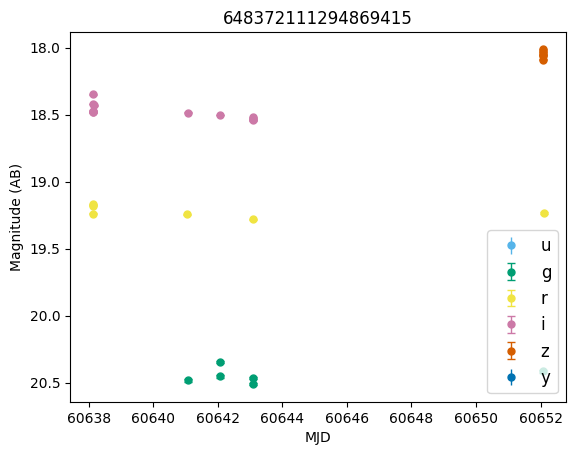

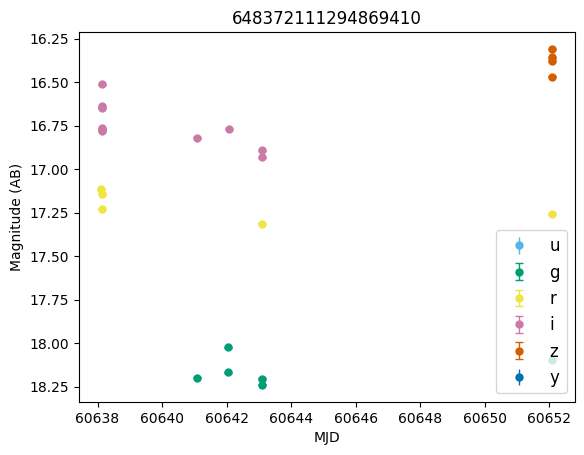

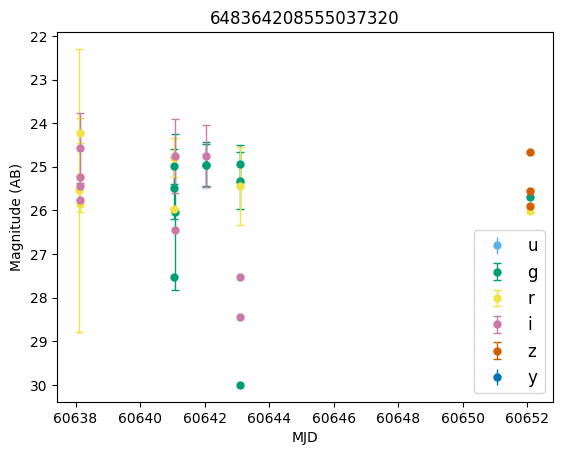

In [8]:
# Plot first 3 lightcurves
for _, row in obj.iloc[:3].iterrows():
    forced_phot = row.objectForcedSource
    fig, ax = plt.subplots()
    _ = plot_mag_scale(ax, forced_phot, 'psfFlux', 'psfFluxErr', 'midpointMjdTai', 'MJD', True)
    ax.set_title(row.objectId)

#### Look at the dataframe of forced photometry for one object

In [9]:
row.objectForcedSource

,parentObjectId,coord_ra,coord_dec,visit,detector,band,psfFlux,psfFluxErr,psfFlux_flag,psfDiffFlux,psfDiffFluxErr,psfDiffFlux_flag,diff_PixelFlags_nodataCenter,pixelFlags_bad,pixelFlags_cr,pixelFlags_crCenter,pixelFlags_edge,pixelFlags_interpolated,pixelFlags_interpolatedCenter,pixelFlags_nodata,pixelFlags_saturated,pixelFlags_saturatedCenter,pixelFlags_suspect,pixelFlags_suspectCenter,invalidPsfFlag,tract,patch,forcedSourceId,psfMag,psfMagErr,midpointMjdTai
0,0,37.624191,6.423925,2024112300214,8,r,220.622101,219.501724,False,-2.257869,228.637009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600386154050625028,25.540878,3.242764,60638.121544
1,0,37.624191,6.423925,2024112300218,8,r,166.425949,222.438919,False,-62.874538,230.529510,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600386154587496281,25.846947,NaN,60638.123959
2,0,37.624191,6.423925,2024112300222,7,r,290.271179,180.282654,False,23.896500,180.920334,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600386155123839844,25.242990,0.789077,60638.126446
3,0,37.624191,6.423925,2024112300226,8,r,744.810547,231.436966,False,531.818176,247.727646,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600386155661237091,24.219885,0.348908,60638.128979
4,0,37.624191,6.423925,2024112300237,7,i,181.114044,286.337830,False,81.579918,299.815063,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600386157137105749,25.755119,NaN,60638.139360
5,0,37.624191,6.423925,2024112300241,8,i,540.919006,341.616058,False,434.411560,368.343994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600386157674503018,24.567169,0.807773,60638.141744
6,0,37.624191,6.423925,2024112300245,7,i,289.661591,329.925171,False,183.659958,350.677155,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600386158210847847,25.245274,NaN,60638.144212
7,0,37.624191,6.423925,2024112300249,7,i,243.967926,320.948395,False,185.851852,338.293915,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600386158747719792,25.431667,NaN,60638.146605
8,0,37.624191,6.423925,2024112600104,6,r,440.895416,174.645966,False,209.399948,179.117889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600399333425158825,24.789162,0.454961,60641.047911
9,0,37.624191,6.423925,2024112600108,6,r,148.134811,174.148254,False,-77.193176,177.775848,False,False,False,False,False,False,False,False,False,False,False,False,False,False,10463,33,600399333962029261,25.973356,NaN,60641.050367


### plot flux ratio

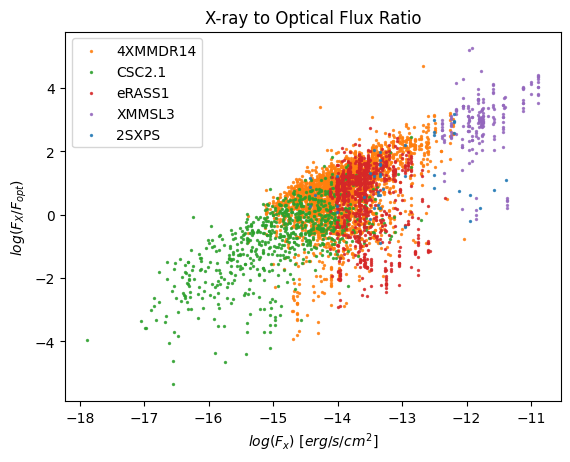

In [10]:
# Plot points with colors based on catalog
CAT_COLORS = {'2SXPS':'tab:blue', '4XMMDR14':'tab:orange', 'CSC2.1':'tab:green', 'eRASS1':'tab:red', 'XMMSL3':'tab:purple'}
for i, cat in enumerate(['4XMMDR14', 'CSC2.1', 'eRASS1', 'XMMSL3', '2SXPS',]):
    mask = np.array(obj['cat_X']) == cat
    plt.scatter(np.log10(obj['F_X'][mask]), np.log10(obj['F_X'][mask])-np.log10(obj['F_opt'][mask]), marker='.', label=cat, alpha=0.8, s=8, color=CAT_COLORS[cat])
   
# Labels and title
plt.xlabel('$log(F_x)~[erg/s/cm^2]$')
plt.ylabel('$log(F_X/F_{opt})$')

plt.title("X-ray to Optical Flux Ratio")

# Legend
plt.legend()

# Show plot
plt.show()

## Look at only this closest match per x-ray object


In [11]:
obj_closest = read_parquet('../data/final_data_products/obj_dp1_xmatch_closest.parquet')

In [12]:
obj_closest.head()

name_X       ra_X      dec_X  e_pos_raw_X field_X     cat_X  \
0  4XMM J033357.2-274159  53.488441 -27.699873     1.887578   ECDFS  4XMMDR14   
1  2CXO J033239.0-274602  53.162875 -27.767236         0.29   ECDFS    CSC2.1   
2  2CXO J033206.5-283151  53.027167 -28.530961         0.79   ECDFS    CSC2.1   
3  2CXO J033118.6-273806  52.827583 -27.635194         2.39   ECDFS    CSC2.1   
4  4XMM J033227.5-283739  53.114762  -28.62756     2.254726   ECDFS  4XMMDR14   

   F_X  e_pos_1sig_X  e_pos_95_X  tract_X  patch_X DP1_flag_X  coord_dec  \
0  0.0      2.023128    3.965331     5063       32       True -27.699881   
1  0.0      0.147959        0.29     5063       34       True -27.767235   
2  0.0      0.403061        0.79     4849       79       True -28.530967   
3  0.0      1.219388        2.39     5063       46       True -27.635178   
4  0.0      2.416641    4.736617     4849       78       True -28.627528   

   coord_decErr   coord_ra  coord_raErr     g_psfFlux  g_psfFluxErr  \
0           0.0  53.488445          0.0     91163.625    911.493042   
1           0.0  53.162874          0.0  14234.386719     14.320952   
2      0.000003  53.027168     0.000002   1654.268188     17.230946   
3      0.000011  52.827575     0.000013    339.131805     23.585014   
4      0.000023  53.114784     0.000027     84.736435      25.71151   

    g_psfMag  g_psfMagErr     i_psfFlux  i_psfFluxErr   i_psfMag  i_psfMagErr  \
0  19.000446     0.010856  351531.65625    474.808411  17.535089     0.001467   
1  21.016653     0.001092  17469.658203     27.549505  20.794289     0.001712   
2  23.353485      0.01131   2965.703125     34.266621  22.719681     0.012545   
3   25.07408      0.07563    748.885376     49.442589  24.213963     0.071786   
4  26.579824     0.340153    166.123489     65.016609  25.848923     0.448868   

             objectId  ...   z_psfMag  z_psfMagErr  \
0  611255622398138244  ...  16.925512     0.001247   
1  611255759837088115  ...  20.839764     0.003368   
2  609788255411391378  ...   22.48848     0.022851   
3  611256584470803912  ...  23.889389     0.136729   
4  609788186691909713  ...  23.975199     0.140678   

                                  objectForcedSource  r_extendedness  \
0  [{parentObjectId: 0, coord_ra: 53.488445, coor...            <NA>   
1  [{parentObjectId: 0, coord_ra: 53.162874, coor...             0.0   
2  [{parentObjectId: 0, coord_ra: 53.027168, coor...             1.0   
3  [{parentObjectId: 0, coord_ra: 52.827575, coor...            <NA>   
4  [{parentObjectId: 0, coord_ra: 53.114784, coor...            <NA>   

   refExtendedness refSizeExtendedness  _dist_arcsec          _healpix_29  \
0              0.0            0.001792      0.030439  2528757285481148437   
1              0.0            0.002478      0.005688  2528751162463702879   
2              1.0            0.456877       0.02114  2528662032583095434   
3              1.0            0.238907       0.06457  2530255766829148073   
4              0.0            0.001169      0.133827  2528655359242713723   

   near_bright_flag  u_psfFluxForcedStetsonJ  g_psfFluxForcedStetsonJ  \
0              True                 3.523859                     <NA>   
1             False                 0.649997                 1.343106   
2             False                -0.420325                 0.048111   
3             False                 0.363351                -0.087782   
4             False                     <NA>                 0.012698   

   r_psfFluxForcedStetsonJ  i_psfFluxForcedStetsonJ  z_psfFluxForcedStetsonJ  \
0                     <NA>                     <NA>                     <NA>   
1                 0.372329                  0.50634                 0.058781   
2                 -0.26963                 0.043738                -0.139307   
3                 0.497287                -0.048623                -0.874233   
4                 -0.28782                -0.422004                 0.085275   

   y_psfFluxForcedS

### plot reliability by field

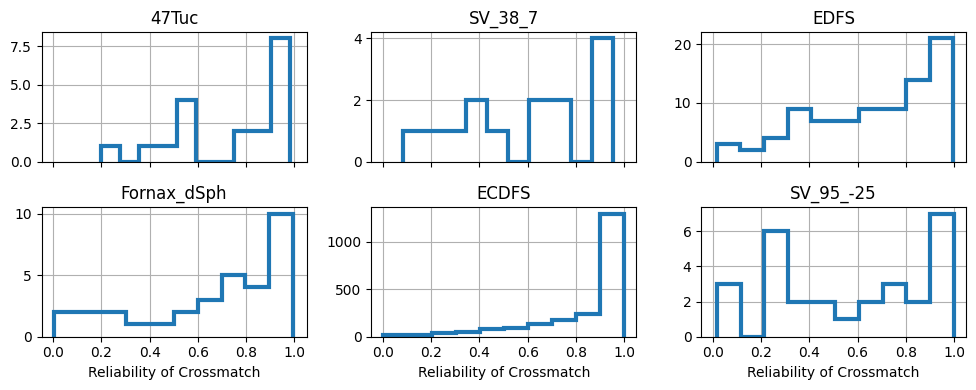

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(10,4))
for i, field in enumerate(['47Tuc', 'ECDFS', 'EDFS', 'Fornax_dSph', 'SV_38_7', 'SV_95_-25']):
    row = i%2
    col = i%3
    sub = obj_closest.query(f'field_X == "{field}"')['reliability']
    sub.hist(ax=axs[row,col], histtype='step', linewidth=3)
    axs[row,col].set_title(field)
    if row == 1:
        axs[row,col].set_xlabel('Reliability of Crossmatch')
plt.tight_layout()

## Look at the crossmatch between obj and SIMBAD

In [15]:
obj_x_sim = pd.read_csv('../data/final_data_products/obj_x_simbad.csv')

In [16]:
obj_x_sim

,main_id_SIM,ra_SIM,dec_SIM,coo_err_maj_SIM,coo_err_min_SIM,coo_err_angle_SIM,coo_wavelength_SIM,coo_bibcode_SIM,otypedef.otype_SIM,otypedef.comment_SIM,otypedef.description_SIM,otypedef.is_candidate_SIM,otypedef.label_SIM,otypedef.otype_longname_SIM,otypedef.otype_shortname_SIM,otypedef.path_SIM,otype_SIM,u_SIM,g_SIM,r_SIM,i_SIM,V_SIM,ra,dec,objectId,field_X,name_X,cat_X,F_X,_dist_arcsec
0,2MASX J02324626+0637429,38.192642,6.628482,14.1429,10.8143,90.0,O,2020yCat.1350....0G,G,NaN,Galaxy,0,Galaxy,Galaxy,G,G,G,NaN,NaN,NaN,NaN,NaN,38.192651,6.628498,648372111294869410,SV_38_7,2SXPS J023246.0+063739,2SXPS,1.140000e-12,0.063555
1,2MASS J02321305+0649513,38.054380,6.830880,0.1256,0.1168,90.0,O,2020yCat.1350....0G,QSO,NaN,Quasar,0,QSO,Quasar,QSO,G > AGN > QSO,QSO,NaN,NaN,NaN,NaN,NaN,38.054383,6.830892,648365376786151216,SV_38_7,2SXPS J023213.2+064951,2SXPS,1.635000e-12,0.042919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,[LBA2005] 330,53.055792,-27.551417,600.0000,600.0000,0.0,X,2016ApJS..224...15X,G,NaN,Galaxy,0,Galaxy,Galaxy,G,G,G,NaN,NaN,NaN,NaN,NaN,53.055828,-27.551439,611256515751317147,ECDFS,2CXO J033213.3-273306,CSC2.1,5.204000e-15,0.140961
1045,Gaia DR3 5062477951795532288,39.597348,-33.940332,0.3235,0.4278,90.0,O,2020yCat.1350....0G,*,NaN,Star,0,Star,Star,*,*,*,NaN,NaN,NaN,NaN,NaN,39.597351,-33.940331,605441198752006374,Fornax_dSph,1eRASS J023823.2-335624,eRASS1,2.732254e-14,0.007920


## join with obj on *objectId* and plot flux ratio by type

In [17]:
obj_x_sim.columns

Index(['main_id_SIM', 'ra_SIM', 'dec_SIM', 'coo_err_maj_SIM',
       'coo_err_min_SIM', 'coo_err_angle_SIM', 'coo_wavelength_SIM',
       'coo_bibcode_SIM', 'otypedef.otype_SIM', 'otypedef.comment_SIM',
       'otypedef.description_SIM', 'otypedef.is_candidate_SIM',
       'otypedef.label_SIM', 'otypedef.otype_longname_SIM',
       'otypedef.otype_shortname_SIM', 'otypedef.path_SIM', 'otype_SIM',
       'u_SIM', 'g_SIM', 'r_SIM', 'i_SIM', 'V_SIM', 'ra', 'dec', 'objectId',
       'field_X', 'name_X', 'cat_X', 'F_X', '_dist_arcsec'],
      dtype='object')

In [18]:
subset = obj_x_sim[['objectId', 'main_id_SIM', 'otype_SIM', 'u_SIM', 'g_SIM', 'r_SIM', 'i_SIM']]

In [19]:
obj_x_sim_merged = obj.merge(subset, how='inner', on='objectId')

In [20]:
obj_by_otype = obj_x_sim_merged['otype_SIM'].value_counts()

In [28]:
# # Plot points with colors based on catalog
# # CAT_COLORS = {'2SXPS':'tab:blue', '4XMMDR14':'tab:orange', 'CSC2.1':'tab:green', 'eRASS1':'tab:red', 'XMMSL3':'tab:purple'}
# plt.figure(figsize=(15, 9))

# for otype, n in obj_by_otype.items():
#     mask = np.array(obj_x_sim_merged['otype_SIM']) == otype
#     if otype == "*":
#         plt.scatter(np.log10(obj_x_sim_merged['F_X'][mask]), np.log10(obj_x_sim_merged['F_X'][mask])-np.log10(obj_x_sim_merged['F_opt'][mask]), 
#                 marker='*', label=otype, alpha=0.8, s=150)        
#     elif otype in ["CV*", "EB*"]:
#         plt.scatter(np.log10(obj_x_sim_merged['F_X'][mask]), np.log10(obj_x_sim_merged['F_X'][mask])-np.log10(obj_x_sim_merged['F_opt'][mask]), 
#                 marker='*', label=otype, alpha=0.8, s=500)        
#     elif n > 13:
#         plt.scatter(np.log10(obj_x_sim_merged['F_X'][mask]), np.log10(obj_x_sim_merged['F_X'][mask])-np.log10(obj_x_sim_merged['F_opt'][mask]), 
#                 marker='.', label=otype, alpha=0.8, s=30)
#     else:
#         plt.scatter(np.log10(obj_x_sim_merged['F_X'][mask]), np.log10(obj_x_sim_merged['F_X'][mask])-np.log10(obj_x_sim_merged['F_opt'][mask]), 
#                 marker='.', label=otype, alpha=0.8, s=150)        
   
# # Labels and title
# plt.xlabel('$log(F_x)~[erg/s/cm^2]$')
# plt.ylabel('$log(F_X/F_{opt})$')

# plt.title("X-ray to Optical Flux Ratio by otype")

# # Legend
# plt.legend()

# # Show plot
# plt.show()

### Use lsdb to get full Gaia information including BP - RP color (Requires lsdb)

for more info see the lsdb documentation:  
https://data.lsdb.io/#Gaia/Gaia_DR3_(GAIA_SOURCE)  
https://docs.lsdb.io/en/latest/index.html   

In [27]:
import lsdb

gaia_dr3 = lsdb.open_catalog('/epyc/data3/hats/catalogs/gaia_dr3/', 
                             columns=['source_id', 'bp_rp','ra',
       'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pm',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'phot_g_n_obs',
       'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_mag',
       'phot_bp_n_obs', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_n_obs', 'phot_rp_mean_flux',
       'phot_rp_mean_flux_error', 'phot_rp_mean_mag'])


In [28]:
obj_x_gaia_merged.rename({'coord_ra':'ra', 'coord_dec':'dec'}, inplace=True, axis=1)
gaia_subset = lsdb.from_dataframe(obj_x_gaia_merged)

#### crossmatching is very fast because the catalog is in hipscat format

In [29]:
result_x_gaia = gaia_subset.crossmatch(gaia_dr3, suffixes=["", "_GAIA_DR3"], radius_arcsec=.99).compute()


In [30]:
# check the source ids are identical
(result_x_gaia['source_id_GAIA'] == result_x_gaia['source_id_GAIA_DR3']).sum()

274

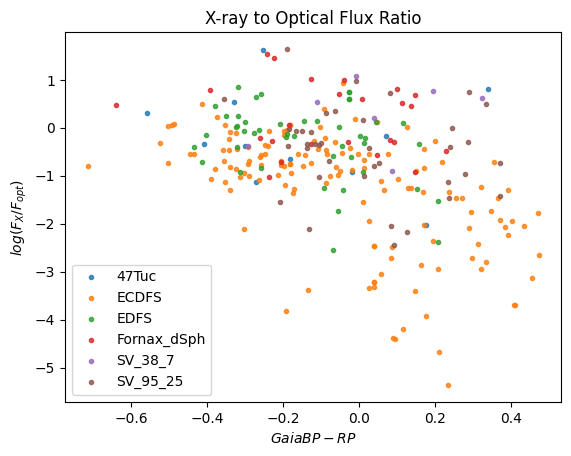

In [31]:
# Plot points with colors based on field
FIELDS = ['47Tuc', 'ECDFS', 'EDFS', 'Fornax_dSph', 'SV_38_7', 'SV_95_25']
for i, field in enumerate(FIELDS):
    mask = np.array(result_x_gaia['field_X']) == field
    plt.scatter(np.log10(result_x_gaia['bp_rp_GAIA_DR3'][mask]), np.log10(result_x_gaia['F_X'][mask])-np.log10(result_x_gaia['F_opt'][mask]), marker='.', label=field, alpha=0.8)
   
# Labels and title
plt.xlabel('$Gaia BP - RP$')
plt.ylabel('$log(F_X/F_{opt})$')

plt.title("X-ray to Optical Flux Ratio")

# Legend
plt.legend()

# Show plot
plt.show()

<Axes: >

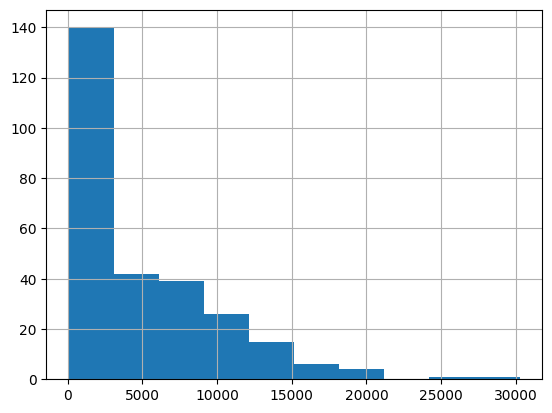

In [32]:
result_x_gaia['r_med_photogeo_GAIA'].hist()